In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-27 11:53:51.103226


<h1>Kynttiläkaavioita ja liukuvia keskiarvoja</h1>

Seuraavassa tarvitaan <b>pandas-datareader</b> -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen esimerkiksi seuraavasti:
<ul>
    <li>Käynnistä Anaconda Navigator ja valitse <b>Environments</b></li>
    <li>Jos <b>pandas-datareader</b> ei ole <b>Installed</b>-listassa, niin siirry <b>Not installed</b> -listaan</li>
    <li>Jos <b>pandas-datareader</b> ei löydy tästäkään listasta, niin päivitä lista (<b>Update index</b>)</li>
    <li>Valitse <b>pandas-datareader</b> ja napsauta alareunasta <b>Apply</b> ja seuraa asennuksen vaiheita.</li>
</ul>

Seuraavassa käytetään <b>mplfinance</b>-kirjastoa, jonka voit asentaa komennolla
<b>pip install --upgrade mplfinance</b> (voit suorittaa komennon Jypyter notebookissa). Toimiakseen mplfinance edellyttää pandas- ja matplotlib-kirjastoja.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader.data as web

import mplfinance as mpf

%matplotlib inline

<h2>Datojen nouto</h2>

Kurssihistorioita voit noutaa Yahoo Finance -palvelusta. Voit googlata muiden osakkeiden nimiä. Esimerkiksi halulla 'yahoo finance kemira' löydät Kemiran nimen Yahoossa.

In [3]:
elisa = web.DataReader('ELISA.HE', start = '2015-1-1', data_source = 'yahoo')

In [4]:
elisa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,22.870001,22.549999,22.610001,22.680000,206279.0,16.803360
2015-01-05,22.850000,22.309999,22.700001,22.400000,249378.0,16.595909
2015-01-07,23.139999,22.100000,22.500000,22.920000,531047.0,16.981169
2015-01-08,23.200001,22.760000,22.900000,22.830000,381383.0,16.914490
2015-01-09,23.120001,22.760000,22.809999,22.860001,305832.0,16.936718
...,...,...,...,...,...,...
2021-10-21,53.360001,52.240002,52.680000,52.520000,363018.0,52.520000
2021-10-22,53.520000,52.799999,53.240002,53.360001,263853.0,53.360001
2021-10-25,53.480000,52.820000,53.299999,53.060001,221163.0,53.060001


<b>Tärkeää</b>: Seuraavassa oletetaan, että datasta löytyy yllä näkyvällä tavalla nimetyt muuttujat (sarakkeet): High, Low, Open, Close, Volume.

<h2>Kynttiläkaavio</h2>

Parametri <b>show_nontrading = True</b> näyttää tyhjän välin viikonloppujen kohdalla.

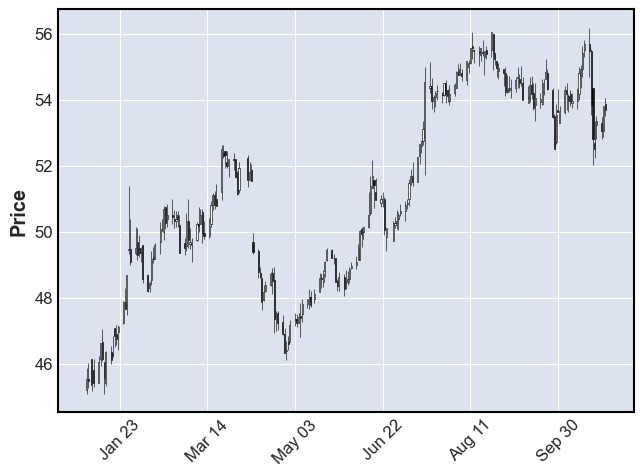

In [5]:
mpf.plot(elisa['2021':], type = 'candle', show_nontrading = True)

<h2>Liukuvia keskiarvoja</h2>

Parametri <b>mav = (50, 150)</b> piirtää 50 päivän ja 150 päivän liukuvat keskiarvot. 

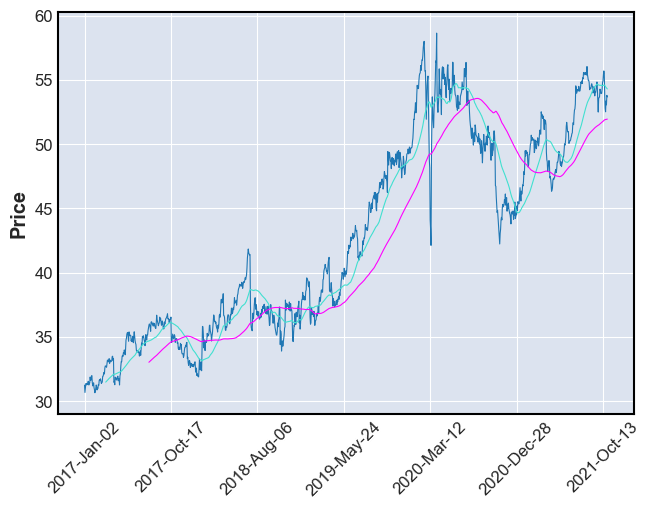

In [6]:
mpf.plot(elisa['2017':], type = 'line', mav = (50, 150))

<h2>Vaihdon määrä</h2>

Parametri <b>volume = True</b> lisää kaavioon vaihdon määrän (Volume).

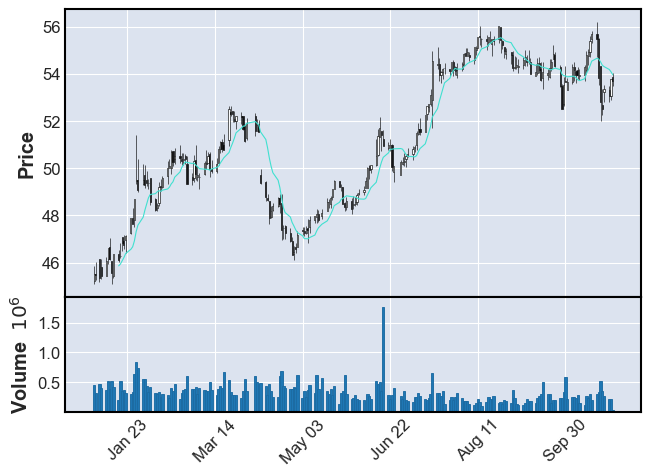

In [7]:
mpf.plot(elisa['2021':], type = 'candle', mav = (10), volume = True, show_nontrading = True)

Lisätietoa https://github.com/matplotlib/mplfinance